Using MPI version 3.1, 1 processes
-----------
Initializing structure...
time for choose_chunkdivision = 0.000143979 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10,10,10)
time for set_epsilon = 0.0691459 s
-----------


FloatProgress(value=0.0, description='0% done ')

run 0 finished at t = 100.0 (4000 timesteps)


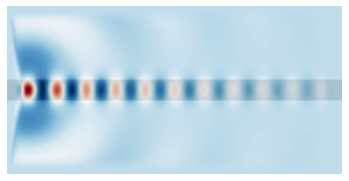

In [1]:
# From the Meep tutorial: plotting permittivity and fields of a straight waveguide
import meep as mp

cell = mp.Vector3(16, 8, 0)

geometry = [
    mp.Block(
        size=mp.Vector3(mp.inf, 1, mp.inf),
        center=mp.Vector3(),
        material=mp.Medium(epsilon=10,chi3=0),
    )
]
sources = [
    mp.Source(
        mp.GaussianSource(frequency=0.25,fwidth=.01), component=mp.Ez, center=mp.Vector3(-7, 0)
    )
]

pml_layers = [mp.PML(1.0)]

resolution = 20

sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
)

# sim.run(until=200)
sim.run(until=100)

import matplotlib.pyplot as plt
import numpy as np

eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
# plt.figure()
# plt.imshow(eps_data.transpose(), interpolation="spline36", cmap="binary")
# plt.axis("off")
# plt.show()

ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation="spline36", cmap="binary")
plt.imshow(ez_data.transpose(), interpolation="spline36", cmap="RdBu", alpha=0.9)
plt.axis("off")
plt.show()

In [3]:
cell = mp.Vector3(16, 8, 0)

In [4]:
geometry = [
    mp.Block(
        mp.Vector3(mp.inf, 1, mp.inf),
        center=mp.Vector3(),
        material=mp.Medium(epsilon=12),
    )
]

In [5]:
sources = [
    mp.Source(
        mp.ContinuousSource(frequency=0.15), component=mp.Ez, center=mp.Vector3(-7, 0)
    )
]

In [6]:
pml_layers = [mp.PML(1.0)]

In [7]:
resolution = 10

In [8]:
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000113878 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.021864 s
-----------


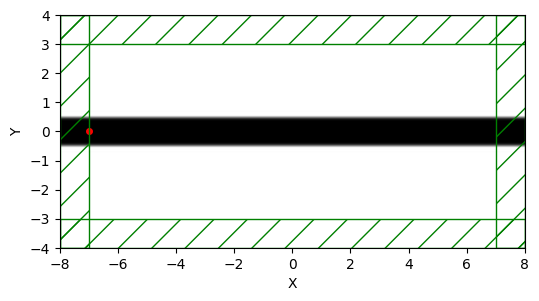

In [9]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.figure(dpi=100)
sim.plot2D()
plt.show()

In [11]:
sim.run(until=200)

FloatProgress(value=200.0, description='0% done ', max=400.0, min=200.0)

on time step 4000 (time=200), 0.0201339 s/step
run 1 finished at t = 400.0 (8000 timesteps)


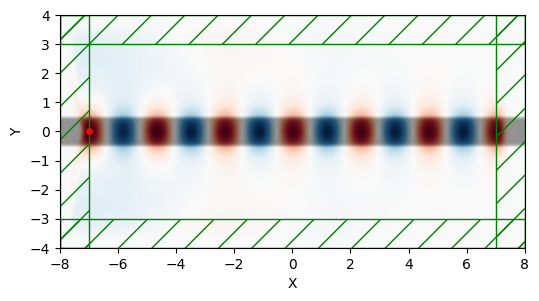

In [12]:
plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [15]:
sim.reset_meep()
f = plt.figure(dpi=100)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True,sim=sim)
plt.close()

In [16]:
sim.run(mp.at_every(1, Animate), until=100)
plt.close()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000287246 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0207697 s
-----------


FloatProgress(value=0.0, description='0% done ')

Normalizing field data...
run 2 finished at t = 100.0 (2000 timesteps)


In [17]:
filename = "media/straight_waveguide.mp4"
Animate.to_mp4(10, filename)

Generating MP4...


FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg': 'ffmpeg'

In [18]:
from IPython.display import Video

Video(filename)

ValueError: To embed videos, you must pass embed=True (this may make your notebook files huge)
Consider passing Video(url='...')